# Procedura 1: RandomForestClassifier

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import pandas as pd 

df = pd.read_csv('c:/1/kaggletrain.csv')
df = df.dropna(how='any')
df.head(2)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S



<span style="color:blue">Podział na zmienne zmienne niezależne:</span> 'Age', 'Pclass', 'Fare'<span style="color:blue">i zmienną zależną:  </span> 'Survived'
    
<span style="color:blue">Tworzymy zmienne zbiory treningowe i testowe</span>

In [2]:
y = df['Survived']
X = df[['Age', 'Pclass', 'Fare']]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

<span style="color:blue">Tworze model RandomForestClassifier - model Random Forest nr.1</span>

In [3]:
from sklearn.pipeline import Pipeline

#this is the classifier used for feature selection
RF1 = RandomForestClassifier(n_estimators=30, 
                                        random_state=42,
                                        class_weight="balanced")

<span style="color:blue">Tworze inny model klasyfikacji: GradientBoostingClassifier używając jako estymatora Random Forest </span>

In [4]:
RFECV = RFECV(estimator=RF1, 
              step=1, 
              cv=5, 
              scoring = 'roc_auc')

<span style="color:blue">Znowu tworze model RandomForestClassifier - model Random Forest nr.2</span>

In [5]:
RF2 = RandomForestClassifier(n_estimators=10, 
                             random_state=42,
                             class_weight="balanced") 

<span style="color:blue">Tworzymy siatkę grid dla - model Random Forest nr.2</span>

In [6]:
Grid_RF2 = GridSearchCV(RF2, 
                      param_grid={'max_depth':[2,3]},
                      cv= 5, scoring = 'roc_auc')

<span style="color:blue">Tworze pipeline</span>

In [7]:
pipeline  = Pipeline([('RFECV',RFECV),
                      ('Grid_RF2',Grid_RF2)])

pipeline.fit(X_train, y_train)
pipeline.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

<span style="color:blue">Blok diagnostyczny</span>

In [8]:
import numpy as np
y_pred = pipeline.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

co_matrix = metrics.confusion_matrix(y_test, y_pred)

print('Confusion_matrix')
co_matrix

print(classification_report(y_test, y_pred)) 

print("Accuracy:   ",np.round(metrics.accuracy_score(y_test, y_pred), decimals=2))
print("Precision:  ",np.round(metrics.precision_score(y_test, y_pred), decimals=2))
print("Recall:     ",np.round(metrics.recall_score(y_test, y_pred), decimals=2))
print("F1 score:   ",np.round(metrics.f1_score(y_test, y_pred), decimals=2))

Confusion_matrix
              precision    recall  f1-score   support

           0       0.54      0.57      0.55        23
           1       0.73      0.71      0.72        38

    accuracy                           0.66        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.66      0.66      0.66        61

Accuracy:    0.66
Precision:   0.73
Recall:      0.71
F1 score:    0.72


<span style="color:blue">Ocena parametrów</span>

In [28]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

print('best_params_:  ', Grid_RF2.best_params_)

print('best_score_:   ',Grid_RF2.best_score_)
print('best_estimator_:',Grid_RF2.best_estimator_)

best_params_:   {'max_depth': 3}
best_score_:    0.5983649607383937
best_estimator_: RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)


<span style="color:blue">Wykres ROC</span>

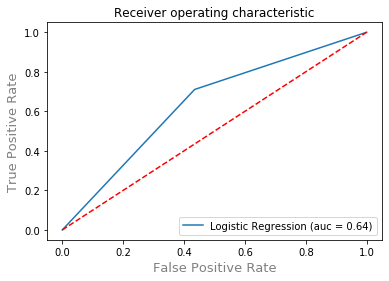

In [36]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

In [38]:
import numpy as np
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,  y_pred)

0.6378718535469108